## I. Spending Data

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split


In [3]:
# Load ABT from Module 3
df = pd.read_csv('analytical_base_table.csv')
print(df.shape)
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

(1863, 40)


In [4]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)
print( len(X_train), len(X_test), len(y_train), len(y_test) )


1490 373 1490 373


## II. Preprocessing & Pipelines

In [5]:
X_train.describe()


,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.434,2.579,2322.785,12746.660,0.879,39.496,4.389,5.005,5.186,39.561,3.362,22.909,15.770,38.509,69.471,65.013,464.266,139.610,6.510,2.779,0.093,24.344,0.266,17.940,0.360,0.024,0.059,0.066,0.119,0.038,0.268,0.066,0.073,0.644,0.189,0.060,0.034,0.419,0.581
std,1.073,0.930,1297.102,34805.545,0.327,46.986,4.498,8.442,7.443,52.335,4.694,25.724,17.999,6.615,19.865,17.093,227.250,71.511,1.975,0.517,0.290,21.209,0.442,6.452,0.480,0.154,0.236,0.248,0.324,0.190,0.443,0.248,0.260,0.479,0.392,0.238,0.180,0.494,0.494
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1351.000,1542.000,1.000,6.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,59.000,53.250,321.000,94.000,5.000,3.000,0.000,6.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,3.000,1913.500,6183.000,1.000,21.000,3.000,2.000,3.000,20.000,2.000,15.000,10.000,38.000,74.000,66.000,426.000,125.000,7.000,3.000,0.000,20.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,3014.750,11761.000,1.000,56.000,7.000,6.000,6.000,50.000,5.000,35.000,21.000,43.000,84.000,78.000,572.000,169.000,8.000,3.000,0.000,38.000,1.000,24.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,114.000,1.000,30.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [6]:
X_train_new = (X_train - X_train.mean()) / X_train.std()


In [7]:
X_train_new.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_test_new = (X_test - X_train.mean()) / X_train.std()
X_test_new.describe()
make_pipeline(StandardScaler(), Lasso(random_state=123))
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123))
}
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))


## III. Tuning Hyperparameters

In [8]:
pipelines['lasso'].get_params()
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}
# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [9]:
type(model)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [10]:
model.fit(X_train, y_train)

fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.


## IV. Model Selection

In [11]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.3086275110508401
ridge 0.3166111585985649
enet 0.34287462866116075


In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
fitted_models['lasso']
pred = fitted_models['lasso'].predict(X_test)

In [13]:
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.4088862476281637
MAE: 85035.54256465772


## <span style="color:RoyalBlue"> 5.1 - Checking the Work</span>

#### A.) Confirming that I've successfully separated the data into a training set and a test set.

In [14]:
df = pd.read_csv('analytical_base_table.csv')
print( '{} observations in the training set.'.format( len(X_train) ) )
print( '{} observations in the test set.'.format( len(X_test) ) )

1490 observations in the training set.
373 observations in the test set.


#### B.) Displaying the Ridge regression pipeline object saved in the pipelines dictionary.

In [15]:
print(pipelines['ridge'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=123,
                       solver='auto', tol=0.001))],
         verbose=False)


#### C.) Finally, displaying the <code>l1_ratio</code> hyperparameter values to try for your Elastic-Net algorithm.


In [16]:
print( enet_hyperparameters['elasticnet__l1_ratio'] )

[0.1, 0.3, 0.5, 0.7, 0.9]


## <span style="color:RoyalBlue"> 5.2 - Sklearn's Standard Scaler</span>

#### A.) Displaying the standardization parameters for the <code>beds</code> feature in the training set (<code>X_train</code>).


In [20]:
print( 'Mean:', X_train.beds.mean() )
print( 'Standard Deviation:', X_train.beds.std() )

Mean: 3.434228187919463
Standard Deviation: 1.0729140858452646


#### B.) Manually standardizing the first 5 observations from the <code>beds</code> feature in the training set.

In [21]:
(X_train.beds.head() - 3.434228187919463) / 1.0729140858452646


1689    1.459
1531    0.527
668    -0.405
1740    1.459
117    -1.337
Name: beds, dtype: float64

#### C.) Manually standardizing the first 5 observations from the <code>beds</code> feature in the test set. 

In [22]:
(X_test.beds.head() - 3.434228187919463) / 1.0729140858452646


266   -1.337
790   -0.405
222   -1.337
220   -1.337
920   -0.405
Name: beds, dtype: float64

#### D.) Initializing <code>StandardScaler()</code>. Fitting standard scaler to training set.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### E.) Displaying the preprocessing parameters directly from the <code>scaler</code> object.

In [24]:
print( 'Mean:', scaler.mean_[0] )
print( 'Standard Deviation:', scaler.scale_[0] )

Mean: 3.434228187919463
Standard Deviation: 1.0725539871320342


#### F.) Next, using the <code>scaler</code> object to <code>.transform()</code> your test set and save it as <code>X_test_new</code>.

In [25]:
X_test_new = scaler.transform(X_test)

#### G.) Displaying the class and shape of <code>X_test_new</code> to check work.

In [26]:
print(type(X_test_new))
print(X_test_new.shape)

<class 'numpy.ndarray'>
(373, 39)


#### H.) Finally, displaying the first 5 transformed values for the <code>beds</code> feature.


In [27]:
print(X_test_new[:5,0])

[-1.33720839 -0.40485439 -1.33720839 -1.33720839 -0.40485439]


## <span style="color:RoyalBlue"> 5.3 - Tree Pipelines</span>

#### A.) Adding pipelines for <code style="color:SteelBlue">RandomForestRegressor</code> and <code style="color:SteelBlue">GradientBoostingRegressor</code> to pipeline dictionary.

In [28]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),
                                GradientBoostingRegressor(random_state=123))

#### B.) Just as a quick sanity check, displaying the pipeline object for random forest.

In [29]:
print(pipelines['rf'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)


#### C.) As another quick sanity check, displaying the class for the pipeline object for your random forest.

In [30]:
print(type(pipelines['rf']))

<class 'sklearn.pipeline.Pipeline'>


#### D.) Finally, checking that all of the model pipelines are of the correct type. For each item in your <code>pipelines</code> dictionary, display its key and the class of its value.

In [31]:
for i, j in pipelines.items(): 
    print(i, type(j))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


## <span style="color:RoyalBlue"> 5.4 - Hyperparameter Grids</span>

#### A.) Declaring a hyperparameter grid for <code style="color:SteelBlue">RandomForestRegressor</code>.


In [32]:
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

#### B.) Declaring a hyperparameter grid for <code style="color:SteelBlue">GradientBoostingRegressor</code>.
* Name it <code style="color:steelblue">gb_hyperparameters</code>.
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__learning_rate'</span>: [0.05, 0.1, 0.2]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__max_depth'</span>: [1, 3, 5]</code>

In [33]:
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

#### C.) Creating a <code style="color:steelblue">hyperparameters</code> dictionary.

In [34]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

#### D.) Finally, running this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.

In [35]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


## <span style="color:RoyalBlue"> 5.5 - Model Dictionaries</span>

#### A.) Creating a dictionary of models named <code style="color:SteelBlue">fitted_models</code> to store models that have been tuned using cross-validation.

In [36]:
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


#### B.) Checking that the models are of the correct type. For each item in  <code>fitted_models</code> dictionary, display its key and the class of its value.

In [37]:
for i, j in fitted_models.items():
    print(i, type(j))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


#### C.) Finally, running this code to check that the models have been fitted correctly.

In [38]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


## <span style="color:RoyalBlue"> 5.6 - Model Selection</span>

#### A.) First, displaying the cross-validated training performance for each model in <code style="color:SteelBlue">fitted_models</code> .

In [39]:
for i, j in fitted_models.items(): 
    print(i, j.best_score_)

lasso 0.3086275110508401
ridge 0.3166111585985649
enet 0.34287462866116075
rf 0.48052493948124625
gb 0.48815067422416847


#### B.) Using a <code style="color:SteelBlue">for</code> loop, printing the performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.


In [40]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.4088862476281637
MAE: 85035.54256465772

ridge
--------
R^2: 0.4093396476329718
MAE: 84978.03564808934

enet
--------
R^2: 0.4052451373126301
MAE: 86298.63725254669

rf
--------
R^2: 0.5710019128514657
MAE: 67900.87068364612

gb
--------
R^2: 0.5269037813440294
MAE: 71135.14693585342



#### C.) Finally, plotting the performance of the winning model on the test set.

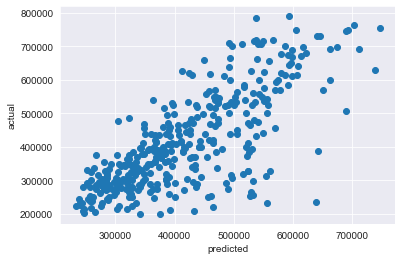

In [41]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## <span style="color:RoyalBlue"> 5.7 - Saving The Model</span>

#### A.) Displaying the class of the winning "model" in the <code>fitted_models</code> dictionary object.

In [42]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

#### B.) Confirming I can access the winning model pipeline. Displaying the class of the model pipeline.

In [43]:
type(fitted_models['rf'].best_estimator_)


sklearn.pipeline.Pipeline

#### C.) Displaying the winning pipeline object directly. 

In [44]:
fitted_models['rf'].best_estimator_


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

The winning values for our hyperparameters are:
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

#### D.) Finally, saving the winning <code style="color:steelblue">Pipeline</code> object. To do so, I import <code style="color:steelblue">pickle</code>, which saves Python objects to disk.

In [45]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)